# Multiclass classification using Tensorflow

### Task

We have a dataset for the numbers shown via sign language, numbers are from 0 to 5. We want to train our network so that it detects the sign shown at the picture.

In [2]:
# importing libraries
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

## Loading data

In [3]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    test_dataset = h5py.File('datasets/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [4]:
# loading the dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 3


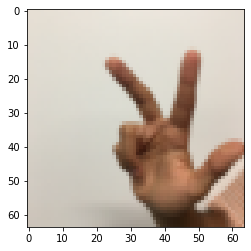

In [5]:
# example of a picture
index = 23
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [6]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [12]:
# flattening the images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T
# normalizing colour values
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
# converting training and test labels to one hot matrices
Y_train = Y_train_orig
Y_test = Y_test_orig

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (1, 1080)
X_test shape: (12288, 120)
Y_test shape: (1, 120)


## NN architecture

The network is pretty simple 3-layer network:
INP -> LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX

The input images are 64x64x3, the outputs are 6 probabilities of belonging to the one or to the other class

In [57]:
# defining the model
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(12288,), activation='relu'),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(6, activation='softmax')
])

In [58]:
# compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
model.fit(X_train.T, Y_train.T, batch_size=128, epochs=400)

Train on 1080 samples
Epoch 1/400
1080/1080 [==============================] - 1s 903us/sample - loss: 3.8373 - acc: 0.1750
Epoch 2/400
1080/1080 [==============================] - 1s 718us/sample - loss: 2.9631 - acc: 0.1574
Epoch 3/400
1080/1080 [==============================] - 1s 753us/sample - loss: 1.9934 - acc: 0.1815
Epoch 4/400
1080/1080 [==============================] - 1s 766us/sample - loss: 1.7917 - acc: 0.1880
Epoch 5/400
1080/1080 [==============================] - 1s 825us/sample - loss: 1.7831 - acc: 0.1546
Epoch 6/400
1080/1080 [==============================] - 1s 812us/sample - loss: 1.7742 - acc: 0.1889
Epoch 7/400
1080/1080 [==============================] - 1s 824us/sample - loss: 1.7721 - acc: 0.1870
Epoch 8/400
1080/1080 [==============================] - 1s 836us/sample - loss: 1.7681 - acc: 0.1898
Epoch 9/400
1080/1080 [==============================] - 1s 857us/sample - loss: 1.7597 - acc: 0.1907
Epoch 10/400
1080/1080 [==============================] - 1s

1080/1080 [==============================] - 0s 309us/sample - loss: 1.3152 - acc: 0.4528
Epoch 81/400
1080/1080 [==============================] - 0s 306us/sample - loss: 1.2980 - acc: 0.4602
Epoch 82/400
1080/1080 [==============================] - 0s 306us/sample - loss: 1.2789 - acc: 0.4694
Epoch 83/400
1080/1080 [==============================] - 0s 307us/sample - loss: 1.2803 - acc: 0.4694
Epoch 84/400
1080/1080 [==============================] - 0s 319us/sample - loss: 1.3184 - acc: 0.4389
Epoch 85/400
1080/1080 [==============================] - 0s 309us/sample - loss: 1.2617 - acc: 0.4787
Epoch 86/400
1080/1080 [==============================] - 0s 308us/sample - loss: 1.2541 - acc: 0.4852
Epoch 87/400
1080/1080 [==============================] - 0s 319us/sample - loss: 1.2527 - acc: 0.4833
Epoch 88/400
1080/1080 [==============================] - 0s 308us/sample - loss: 1.2607 - acc: 0.4880
Epoch 89/400
1080/1080 [==============================] - 0s 304us/sample - loss: 1.28

1080/1080 [==============================] - 0s 311us/sample - loss: 1.0310 - acc: 0.5713
Epoch 160/400
1080/1080 [==============================] - 0s 307us/sample - loss: 1.0356 - acc: 0.5704
Epoch 161/400
1080/1080 [==============================] - 0s 308us/sample - loss: 1.0372 - acc: 0.5769
Epoch 162/400
1080/1080 [==============================] - 0s 308us/sample - loss: 1.0436 - acc: 0.5519
Epoch 163/400
1080/1080 [==============================] - 0s 309us/sample - loss: 1.0357 - acc: 0.5676
Epoch 164/400
1080/1080 [==============================] - 0s 303us/sample - loss: 1.0324 - acc: 0.5731
Epoch 165/400
1080/1080 [==============================] - 0s 303us/sample - loss: 1.0599 - acc: 0.5602
Epoch 166/400
1080/1080 [==============================] - 0s 308us/sample - loss: 1.0466 - acc: 0.5528
Epoch 167/400
1080/1080 [==============================] - 0s 306us/sample - loss: 1.0070 - acc: 0.5769
Epoch 168/400
1080/1080 [==============================] - 0s 303us/sample - l

1080/1080 [==============================] - 0s 307us/sample - loss: 0.7455 - acc: 0.7009
Epoch 238/400
1080/1080 [==============================] - 0s 305us/sample - loss: 0.7330 - acc: 0.6898
Epoch 239/400
1080/1080 [==============================] - 0s 305us/sample - loss: 0.7237 - acc: 0.7037
Epoch 240/400
1080/1080 [==============================] - 0s 301us/sample - loss: 0.7373 - acc: 0.6796
Epoch 241/400
1080/1080 [==============================] - 0s 306us/sample - loss: 0.7565 - acc: 0.6972
Epoch 242/400
1080/1080 [==============================] - 0s 303us/sample - loss: 0.7356 - acc: 0.6889
Epoch 243/400
1080/1080 [==============================] - 0s 303us/sample - loss: 0.7500 - acc: 0.6787
Epoch 244/400
1080/1080 [==============================] - 0s 307us/sample - loss: 0.7606 - acc: 0.6806
Epoch 245/400
1080/1080 [==============================] - 0s 305us/sample - loss: 0.7191 - acc: 0.7148
Epoch 246/400
1080/1080 [==============================] - 0s 304us/sample - l

1080/1080 [==============================] - 0s 305us/sample - loss: 0.5556 - acc: 0.7833
Epoch 316/400
1080/1080 [==============================] - 0s 306us/sample - loss: 0.5721 - acc: 0.7861
Epoch 317/400
1080/1080 [==============================] - 0s 304us/sample - loss: 0.6136 - acc: 0.7620
Epoch 318/400
1080/1080 [==============================] - 0s 304us/sample - loss: 0.5591 - acc: 0.7778
Epoch 319/400
1080/1080 [==============================] - 0s 316us/sample - loss: 0.5913 - acc: 0.7556
Epoch 320/400
1080/1080 [==============================] - 0s 301us/sample - loss: 0.5860 - acc: 0.7639
Epoch 321/400
1080/1080 [==============================] - 0s 303us/sample - loss: 0.6021 - acc: 0.7481
Epoch 322/400
1080/1080 [==============================] - 0s 321us/sample - loss: 0.5914 - acc: 0.7667
Epoch 323/400
1080/1080 [==============================] - 0s 304us/sample - loss: 0.5539 - acc: 0.7898
Epoch 324/400
1080/1080 [==============================] - 0s 317us/sample - l

1080/1080 [==============================] - 0s 306us/sample - loss: 0.4346 - acc: 0.8565
Epoch 394/400
1080/1080 [==============================] - 0s 307us/sample - loss: 0.4914 - acc: 0.8139
Epoch 395/400
1080/1080 [==============================] - 0s 303us/sample - loss: 0.4501 - acc: 0.8361
Epoch 396/400
1080/1080 [==============================] - 0s 306us/sample - loss: 0.4657 - acc: 0.8380
Epoch 397/400
1080/1080 [==============================] - 0s 307us/sample - loss: 0.4154 - acc: 0.8778
Epoch 398/400
1080/1080 [==============================] - 0s 307us/sample - loss: 0.4183 - acc: 0.8796
Epoch 399/400
1080/1080 [==============================] - 0s 303us/sample - loss: 0.4133 - acc: 0.8731
Epoch 400/400
1080/1080 [==============================] - 0s 306us/sample - loss: 0.3965 - acc: 0.8787


## Evaluating the performance

In [60]:
test_loss, test_acc = model.evaluate(X_test.T,  Y_test.T, verbose=2)
print("Loss on test data: %f, accuracy: %f" % (test_loss, test_acc))

120/120 - 0s - loss: 0.7677 - acc: 0.7333
Loss on test data: 0.767741, accuracy: 0.733333


We see that the accuracy on the train set is 87.87%, on the test set 73.33%.

This result is fairly good, as it is obtained on relatively small number of training epochs.

## Testing

Feeding the images from a test set

y = 4


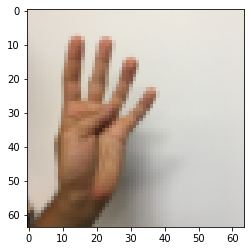

In [61]:
index = 19
# showing the image
plt.imshow(X_test[:, index].reshape(64, 64, -1))
print ("y = " + str(np.squeeze(Y_test[:, index])))

In [62]:
test_img = X_test[:, index].reshape(12288, 1).T
predictions = model.predict(test_img)
predictions

array([[3.7393508e-07, 4.2887097e-10, 3.8100008e-03, 6.6767167e-04,
        8.0150759e-01, 1.9401443e-01]], dtype=float32)

### Visualising the images the model makes mistakes in

In [63]:
predictions = model.predict(X_test.T)

[5.3755301e-01 1.6690331e-08 1.1578352e-05 3.8191244e-01 1.0303226e-03
 7.9492703e-02]
true label:  [5]


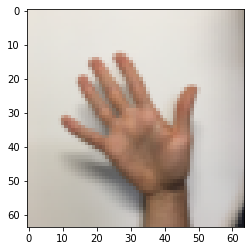

In [72]:
for i in range(predictions.shape[0]):
    if np.argmax(predictions[i]) != Y_test[:, i]:
        plt.imshow(X_test[:, i].reshape(64, 64, -1))
        print(predictions[i])
        print("true label: ", Y_test[:, i])
        break